In [19]:
%load_ext autoreload
%autoreload 2

from perturbations import *
from representation import *
from ls import *
import jupyter_utils as utils

import numpy as np
import matplotlib.pyplot as plt
import tsplib95

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [20]:
# generate the problem instance
n = 30  # number of cities
distance_matrix = random_distances(n)

print("Generated distances between cities:")
print(distance_matrix)

Generated distances between cities:
[[ 0  4 71 70 98 93 76 21 37 43 51  2 39 76 80 94 17 35 19  1 89 49 37 67
  52 15 51 67 51 52]
 [ 4  0 61 45 70  9  4 21 80 67 76 77 13 83 58 74 67 94 83 24 86 18  5 62
  51 61 78 25 70 75]
 [71 61  0 83 63  5 58 67 33 64 61 98 63 53 70 94 89  9 45  5 50 85 69 23
  11 86 93 80 67 35]
 [70 45 83  0  3 44 93 96 93 11 13 58 55 44 30 21 63 85 83 88 34 66 69 31
  43 11 95  4 55 58]
 [98 70 63  3  0 40  4  9 80 28 32 25 79 37 91 66  6 34 81 29 97 30 61  8
   4 14 16 57 87 98]
 [93  9  5 44 40  0 10 67 57 67 51 93 67 87 34 97 56 62 72 60 70 23 64 14
  12 84 74 14 47 69]
 [76  4 58 93  4 10  0 83 13 76 14 51 80 45 30  8 31 27 25 95 60 84 77 49
  88 37 64  3  2 75]
 [21 21 67 96  9 67 83  0 49 41 36 83 26 94 34 65 26 88 53 21 50  8 16 64
  51 42  5 78 24 68]
 [37 80 33 93 80 57 13 49  0 17 89 79 77 87 69 59 73 95 36  2 43 74 91 25
  54 28 57 29 41 17]
 [43 67 64 11 28 67 76 41 17  0 18 52 32 63 30 31 50 20 25 62 68 72 85 17
  39  3  9 89 58 28]
 [51 76 61 13 

In [21]:
# load problem from the library
problem = tsplib95.load("./archives/bayg29.tsp/bayg29.tsp")
#  ./archives/bayg29.tsp/bayg29.tsp
n = problem.dimension
distance_matrix = utils.weights_to_matrix(problem.edge_weights)
print("size of matrix: ", n)
# best = 1610

size of matrix:  29


In [22]:
perturbation = perturb_switch
#           perturb_move
#           perturb_invert
#           perturb_switch

ls = ls_first_improvement
#           ls_first_improvement
#           ...

init_fn = better_init_wrapper(size=n, dist_matrix=distance_matrix)
#           random_init_wrapper(size=n)
#           better_init_wrapper(size=n,dist_matrix = distance_matrix)

name_perturb = "switch"
name_ls = "first-improve"
max_steps = 500
max_evals = 1_000_000

In [24]:
# inits
fitness = fitness_wrapper(distance_matrix)

# do the search here!
results = ls(
    fitness_fn=fitness,
    initialisation_fn=init_fn,
    perturbation_fn=perturbation,
    max_steps=max_steps,
    max_evals=max_evals,
)

# separate and print results!
best_fitness = results["best_fitness"]
best_order = results["best_order"]
history = results["history"]
utils.print_results(results)

[ 4  8  2  0 25 17 21  5  7  9 28 26 16  3 19 15 12 18 14 13 23 10 27 20
  1 11  6 22 24]


TypeError: 'numpy.int32' object is not iterable

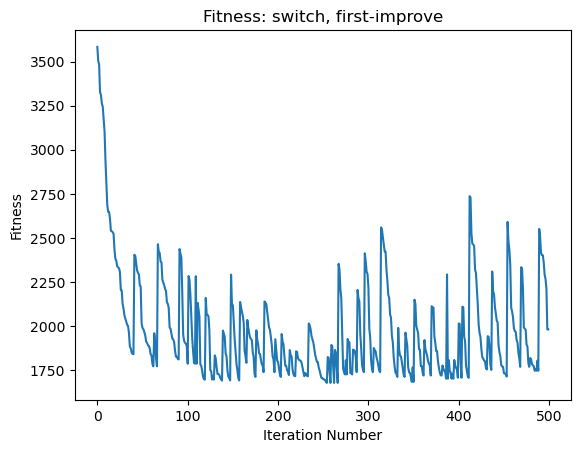

In [15]:
fitness = [iteration["fitness"] for iteration in history]
utils.simple_graph(
    fitness,
    "Iteration Number",
    "Fitness",
    f"Fitness: {name_perturb}, {name_ls}",
)

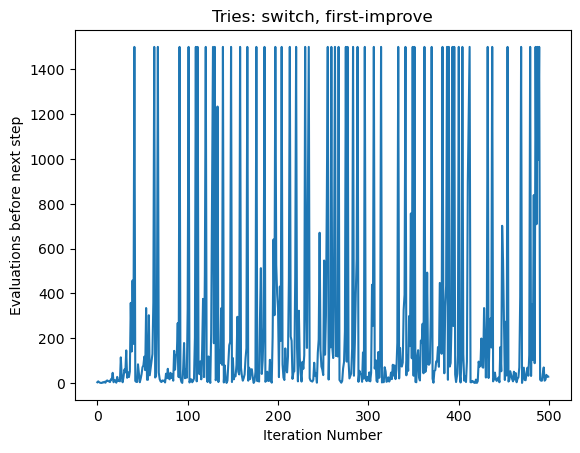

In [16]:
tries = [iteration["local_evals"] for iteration in history]
utils.simple_graph(
    tries,
    "Iteration Number",
    "Evaluations before next step",
    f"Tries: {name_perturb}, {name_ls}",
)

### Try all perturbs, select the best

In [25]:
perturbation = parallel_switch
#           parallel_move
#           parallel_switch
#           parallel_invert

ls = ls_best_improvement
#           ls_first_improvement
#           ls_best_improvement

init_fn = better_init_wrapper(size=n, dist_matrix=distance_matrix)
#           random_init_wrapper(size=n)
#           better_init_wrapper(size=n,dist_matrix = distance_matrix)

max_steps = 200
max_evals = 1_000_000

# inits
fitness = fitness_wrapper(distance_matrix)

In [29]:
# do the search here!
results = ls(
    fitness_fn=fitness,
    initialisation_fn=init_fn,
    perturbation_fn=perturbation,
    max_steps=max_steps,
    max_evals=max_evals,
)

# separate and print results!
best_fitness = results["best_fitness"]
best_order = results["best_order"]
history = results["history"]
utils.print_results(results)

Best solution found:
[17  3  9 12 20  4  8  5  0 23 15 18 24  6 22 26  7 27 11 25  2 28  1 19
 14 10 21 16 13]
With fitness:  1838.0
Total steps taken:  200


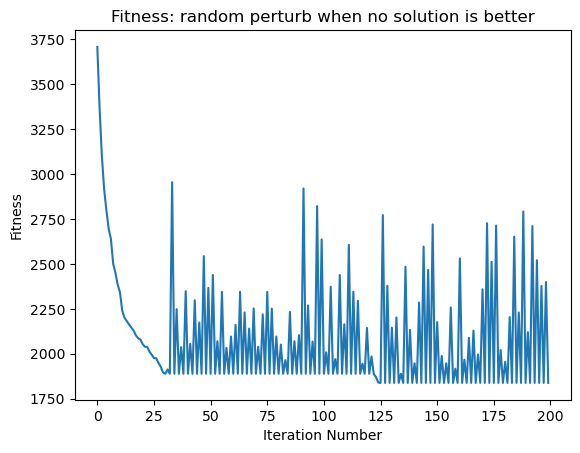

restarted:  83


In [30]:
fitness_list = [iteration["fitness"] for iteration in history]
utils.simple_graph(
    fitness_list,
    "Iteration Number",
    "Fitness",
    f"Fitness: random perturb when no solution is better",
)
restarts = [iteration["restart here"] for iteration in history]
num_restarts = sum(restarts)
print("restarted: ", num_restarts)